In [8]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
from pandas import Series, DataFrame

In [2]:
today=datetime.datetime.now().year*10000+datetime.datetime.now().month*100+datetime.datetime.now().day


In [78]:
#url='http://www.twse.com.tw/exchangeReport/MI_INDEX?response=html&date=20180426&type=ALL'
#a = pd.io.html.read_html(url)
import sys
import time
import datetime
import gspread
from oauth2client.service_account import ServiceAccountCredentials as SAC
t= datetime.datetime.now()
def upload_data_to_googledrive(stock_data):
    GDriveJSON = 'PythonUpload.json'
    GSpreadSheet = 'stock'
    count=0
    try:
        scope =['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        key = SAC.from_json_keyfile_name(GDriveJSON, scope)
        gc = gspread.authorize(key)
        worksheet = gc.open(GSpreadSheet).sheet1
    except Exception as ex:
        print('無法連線Google試算表', ex)
        sys.exit(1)
    else:
        worksheet.insert_row(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'],index=1)
        for i in stock_data.index:
            worksheet.insert_row((stock_data['日期'][i],float(stock_data['成交股數'][i]),float(stock_data['成交金額'][i]),
                                  float(stock_data['開盤價'][i]),float(stock_data['最高價'][i]),
                                  float(stock_data['最低價'][i]),float(stock_data['收盤價'][i]),
                                  float(stock_data['漲跌價差'][i]),float(stock_data['成交筆數'][i])),index=2)
        count+=1
        
    return print('upload success',count)
print(str(datetime.datetime.now()-t))

0:00:00.001000


In [4]:
def convert_time(x):   
    return x.year*10000+x.month*100+x.day 
def stock_historydata(stock_number = 2330,start_date =None,
                      last_date = datetime.datetime.now().year*10000 + datetime.datetime.now().month*100 + datetime.datetime.now().day):          
    if start_date != None:
        vfunc = np.vectorize(convert_time)
        date_m = vfunc(pd.date_range(start = str(start_date) ,end = str(last_date), freq='MS').date)
        for i, m in enumerate(date_m):
            time.sleep(5)
            url = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date='+str(m)+'&stockNo='+str(stock_number)
            print(m)
            try:
                pd.io.html.read_html(url)
            except:
                print('無此資料')
            else:
                a = pd.io.html.read_html(url)[0]
                a.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差','成交筆數']
                
                if i==0:
                    x = a
                else:
                    x = x.append(a,ignore_index=True)

    else:
        
        url = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=' + str(last_date) + '&stockNo=' + str(stock_number)
        
        try:
            pd.io.html.read_html(url)
        except:
            print('無此資料')
        else:
            x = pd.io.html.read_html(url)[0]
            x.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差','成交筆數']

    return x

In [10]:
stock_data=stock_historydata(2317,20180401)
stock_data.columns 

20180401
20180501


Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')

In [79]:
upload_data_to_googledrive(stock_data)

upload success 1
upload success


In [12]:
#pd.date_range(start = str(20180201) ,end = str(20180421), freq='MS',MonthBegin=True).date
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,107/04/02,54717977,4835468263,88.5,89.4,87.5,88.1,-0.4,28316
1,107/04/03,59828974,5215608752,87.1,87.5,86.9,87.2,-0.9,28728
2,107/04/09,57130701,4977483453,86.6,88.0,86.5,87.4,0.2,22915
3,107/04/10,35830562,3121816992,86.8,87.5,86.8,87.0,-0.4,16517
4,107/04/11,40026593,3516992083,87.7,88.9,87.3,87.3,0.3,18662


In [37]:
stock_data['日期'][0]

'107/04/02'

In [76]:
import sys
import time
import datetime
import gspread
from oauth2client.service_account import ServiceAccountCredentials as SAC
t= datetime.datetime.now()
def upload_data_to_googledrive(stock_data):
    GDriveJSON = 'PythonUpload.json'
    GSpreadSheet = 'stock'
    count=0
    try:
        scope =['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        key = SAC.from_json_keyfile_name(GDriveJSON, scope)
        gc = gspread.authorize(key)
        worksheet = gc.open(GSpreadSheet).sheet1
    except Exception as ex:
        print('無法連線Google試算表', ex)
        sys.exit(1)
    else:
        worksheet.insert_row(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'],index=1)
        for i in stock_data.index:
            worksheet.insert_row((stock_data['日期'][i],float(stock_data['成交股數'][i]),float(stock_data['成交金額'][i]),
                                  float(stock_data['開盤價'][i]),float(stock_data['最高價'][i]),
                                  float(stock_data['最低價'][i]),float(stock_data['收盤價'][i]),
                                  float(stock_data['漲跌價差'][i]),float(stock_data['成交筆數'][i])),index=2)
        count+=1
        print('upload success',count)
return print('upload success')
print(str(datetime.datetime.now()-t))


upload success 2
0:00:28.612925


In [13]:
stock_data_df = stock_data.copy()
def replace_year(x):
    return x.replace(x[0:3],str(int(x[0:3])+1911))
stock_data_df['日期'] = stock_data_df['日期'].apply(replace_year)

In [14]:
stock_data_df.index=stock_data_df['日期']
stock_data_df.drop(['日期','成交金額','漲跌價差','成交筆數'],axis=1,inplace=True)


In [15]:
stock_data_df.columns=['volume','open','high','low','close']
stock_data_df.head()

,volume,open,high,low,close
日期,,,,,
2018/01/02,28602316,95.4,95.7,94.3,95.0
2018/01/03,58507086,95.0,95.3,94.0,94.0
2018/01/04,53756400,93.6,93.9,92.5,92.6
2018/01/05,59252732,92.3,93.0,91.6,93.0
2018/01/08,50081699,92.3,92.6,91.7,91.8


In [16]:
#資料正規化
from sklearn import preprocessing

def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    
    return newdf
stock_data_norm= normalize(stock_data_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
stock_data_norm.head()

,volume,open,high,low,close
日期,,,,,
2018/01/02,0.045730,0.895954,0.898810,0.891566,0.884848
2018/01/03,0.293485,0.872832,0.875000,0.873494,0.824242
2018/01/04,0.254126,0.791908,0.791667,0.783133,0.739394
2018/01/05,0.299662,0.716763,0.738095,0.728916,0.763636
2018/01/08,0.223682,0.716763,0.714286,0.734940,0.690909


In [18]:
stock_data_norm.index = pd.to_datetime(stock_data_norm.index)

In [19]:
def split_test_data(df,time_frame,train_ratio=0.9):
    number_features = len(df.columns)
    
    datavalue = df.as_matrix()
    
    result=[]
    
    for index in range(len(datavalue) - (time_frame+1) ):
        result.append(datavalue[index: index + (time_frame+1)])
    
    result = np.array(result)
    number_train = round(train_ratio * result.shape[0])
    
    x_train = result[:int(number_train),:-1]
    y_train = result[:int(number_train),-1][:,-1]
    
    x_test = result[int(number_train):,:-1]
    y_test = result[int(number_train):,-1][:,-1]
    
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],number_features))
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],number_features))
    
    return [x_train, y_train, x_test, y_test]

In [20]:
X_train, y_train, X_test, y_test = split_test_data(stock_data_norm, 20)

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    return model
model = build_model( 20, 5 )

In [23]:

# 一個batch有128個instance，總共跑50個迭代
model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)

Train on 44 samples, validate on 5 samples
Epoch 1/50
44/44 [==============================] - 1s 28ms/step - loss: 0.3762 - acc: 0.0000e+00 - val_loss: 0.1230 - val_acc: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3665 - acc: 0.0000e+00 - val_loss: 0.1160 - val_acc: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3519 - acc: 0.0000e+00 - val_loss: 0.1041 - val_acc: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3263 - acc: 0.0000e+00 - val_loss: 0.0807 - val_acc: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2812 - acc: 0.0000e+00 - val_loss: 0.0427 - val_acc: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.2053 - acc: 0.0000e+00 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1254 - acc: 0.0000e+00 - val_loss: 0.0048 - val_acc: 0

In [24]:
def denormalize(df, norm_value):
    original_value = df['close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value
# 用訓練好的 LSTM 模型對測試資料集進行預測
pred = model.predict(X_test)
# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(stock_data_df, pred)
denorm_ytest = denormalize(stock_data_df, y_test)


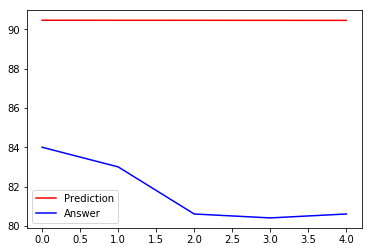

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytest,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

In [26]:
denorm_pred

array([[90.469315],
       [90.467926],
       [90.46718 ],
       [90.46469 ],
       [90.462006]], dtype=float32)

In [ ]:
denorm_ytest